In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
import scipy.special as sc
from scipy.optimize import fsolve
from scipy.stats import norm
import time
np.random.seed(5)

In [2]:
def auction_exp(data_auction, p):
    """auction experiment simulation

    Args:
        data_auction: random sample data for auction simulation
        p: the reserve price
        
    Return:
        revenue: the expected revenue
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [3]:
def rejection_sampling(pi1, pi2, N):
    """rejection sampling algorithm

    Args:
        pi1,pi2: the range of log-lottery distribution
        N: the number of samples from the log-lottery distribution
        
    Return:
        rej_sample: The random samples from the log-lottery distribution
    """

    #using rejection sampling, get N random price samples
    n = 0
    don = pi2*np.log(pi2/pi1) - (pi2-pi1)
    env =(pi2/pi1-1)/don
    rej_sample =[]
    while(n <= N):
        x = uniform.rvs(loc=pi1, scale=pi2-pi1)
        #a is acception probability
        a = (pi2/x-1)/don/env
        u1 = uniform.rvs()
        if (u1 <= a):
            rej_sample.append(x)
            n += 1
    return rej_sample

In [4]:
#This script is used to test the performance of numerical solver

#Azard and Micali k(r) function
#alternative function for Azard and Micali mechanism not in use
def k_r(x):
    return (0.5*(3*x +x**3) -1/r_m)

#Equavelent funtion like A&M, but using consistent notation with Robust paper
def rho_tilde(x):
    return ((x-1)**3)/(x**2) - (27/4)*r_m**2 

#Solve pi1 for the log-lottery distribution
def log_lottery(x):
    return (x * (1 + np.log(cons_m/(x**2) + 1) - np.log(2)) -u_m )


step = np.arange(2, 51,1)
n = 100000
#fixed a U[1,9]
a = 1
b = 9
u = (a+b)/2
sigma = np.sqrt((b-a)**2/12)
r = sigma/u
k = 30 #discretization step
for m in step:
    
    #Compute the mean and standard deviation for the convolution of the uniform distributions    
    u_m = m*u
    sigma_m = np.sqrt(m)*sigma
    r_m = sigma_m/u_m


    # Here we obtain the expected revenue for Azard and Micali mechanism
    rho = fsolve(rho_tilde, [u_m])
    p_AM = u_m*(rho+2)/(3*rho)
    print(rho_tilde(rho))

    
    #compute the APX using the full-bundle log lottery mechanism
    cons_m = u_m**2 + sigma_m**2
    pi1 = fsolve(log_lottery, [u_m*0.9])
    print(log_lottery(pi1))

    


[2.22044605e-16]
[1.0125234e-13]
[1.11022302e-16]
[0.]
[3.48054918e-14]
[7.10542736e-15]
[-5.55111512e-17]
[3.55271368e-15]
[0.]
[3.55271368e-15]
[1.66533454e-16]
[-7.10542736e-15]
[1.55431223e-15]
[-1.42108547e-14]
[1.26842981e-14]
[-7.10542736e-15]
[5.55111512e-17]
[-1.42108547e-14]
[2.77555756e-17]
[0.]
[2.77555756e-17]
[7.10542736e-15]
[1.38777878e-17]
[3.83693077e-13]
[-1.38777878e-17]
[1.42108547e-14]
[1.38777878e-17]
[-1.42108547e-14]
[1.38777878e-17]
[2.13162821e-13]
[9.71445147e-17]
[0.]
[3.05311332e-16]
[8.52651283e-14]
[7.63278329e-16]
[-1.42108547e-14]
[1.90125693e-15]
[5.68434189e-14]
[4.37150316e-15]
[1.42108547e-14]
[9.38138456e-15]
[1.42108547e-14]
[1.90819582e-14]
[4.26325641e-14]
[3.7018999e-14]
[2.7000624e-13]
[-6.9388939e-18]
[-5.68434189e-14]
[-2.08166817e-17]
[0.]
[1.38777878e-17]
[-2.84217094e-14]
[0.]
[2.84217094e-14]
[1.38777878e-17]
[-2.84217094e-14]
[1.38777878e-17]
[0.]
[-6.9388939e-18]
[3.41060513e-13]
[0.]
[2.84217094e-14]
[-1.38777878e-17]
[-2.84217094e-1

In [5]:
#This script is used to perform Experiment 2 for uniform distributions

#Azard and Micali k(r) function
#alternative function for Azard and Micali mechanism not in use
def k_r(x):
    return (0.5*(3*x +x**3) -1/r_m)

#Equavelent funtion like A&M, but using consistent notation with Robust paper
def rho_tilde(x):
    return ((x-1)**3)/(x**2) - (27/4)*r_m**2 

#Solve pi1 for the log-lottery distribution
def log_lottery(x):
    return (x * (1 + np.log(cons_m/(x**2) + 1) - np.log(2)) -u_m )


tic = time.clock()
u_m_list=[]
p_d_list = []
rev_A_list = []
rev_A1_list=[]
DAPX = []
#bundling price for Azar and Marcili mechanism
p_AM = []
p_AM_list = []
p_A1_list = []
rev_A2_list = []
p_A2_list = []
APX_uniform_list = []
APX_rev_list = []
step = np.arange(2, 51,1)
n = 100000
#fixed a U[1,9]
a = 1
b = 9
u = (a+b)/2
sigma = np.sqrt((b-a)**2/12)
r = sigma/u
k = 30 #discretization step
for m in step:
    bid_uniform = []
    bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
    ####################################################################################
    #1.Compute expected revenue for A1:selling separately with optimal reserve price
    if (b/2 >= a):
        rev_A1 = m*auction_exp(bid_uniform,b/2)
        rev_A1_list.append(rev_A1)
        p_A1_list.append(b/2)
    else:
        rev_A1 = m*auction_exp(bid_uniform,a)
        rev_A1_list.append(rev_A1)
        p_A1_list.append(a)
    ###################################################################################
    
    #Generate Y randome variables, where Y = sum(X1,X2,...,Xm)
    j = 0
    bundlebid_uniform = []
    while j < n:
        bid = uniform.rvs(loc=a, scale=b-a,size=m)
        bundlebid_uniform.append(sum(bid))
        j += 1

    #Compute the mean and standard deviation for the convolution of the uniform distributions    
    u_m = m*u
    u_m_list.append(u_m)
    sigma_m = np.sqrt(m)*sigma
    r_m = sigma_m/u_m

                
##### This is direct implementation for Azard and Micali mechanism, alternative, but not in use
#     k = fsolve(k_r, [u])
#     print(k_r(k))
#     p.append(u - k*sigma)
    ###########################################################################################
    # 2.This is equavelent to the Azard and Micali mechanism, we use paper's notation
    # Here we obtain the expected revenue for Azard and Micali mechanism
    rho = fsolve(rho_tilde, [u_m])
    p_AM = u_m*(rho+2)/(3*rho)
    p_AM_list.append(p_AM)
    print(rho_tilde(rho))
    rev_A = auction_exp(bundlebid_uniform,p_AM)
    rev_A_list.append(rev_A[0])
    #experimental upper bound for DAPX
    DAPX.append(u_m/rev_A[0])
    ############################################################################################
    # 3.Here we obtain the expected revenue for A2: selling it grand bundle with optimal reserve price
    # We use discretization here
    prices = np.linspace(p_AM,u_m,k+2)[1:] #we want k discrete values between p_AM and u_m, here we also include u_m to have a look
    rev = []
    for p in prices:
        rev.append(auction_exp(bundlebid_uniform,p))
    #Store the highest expected revenue and corresponding reserve price  
    rev_A2 = max(rev)
    rev_A2_list.append(rev_A2[0])    
    p_A2_list.append(prices[np.argmax(rev)])
    ############################################################################################
    #4.Experiment with the log-lottery auction
    #compute the APX using the full-bundle log lottery mechanism
    cons_m = u_m**2 + sigma_m**2
    pi1 = fsolve(log_lottery, [u_m*0.9])
    pi2 = 0.5*(cons_m/pi1 +pi1)
    print(log_lottery(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2,10000)
    rexp_revenue_list =[]
    for rp_reserve in rej_sample:
        rexp_revenue_list.append(auction_exp(bundlebid_uniform,rp_reserve))
    #compute the expected revenue for randomized auction
    APX_rev = np.average(rexp_revenue_list)
    APX_rev_list.append(APX_rev)
    #Determine the experimental upper bound of APX 
    APX_uniform_list.append(u_m/APX_rev)
    
    
toc = time.clock()
print('time: ' + str(toc-tic))    
# print('the expected revenue for Azard and Marcili: ' + str(rev_A))    
# print('the expected revenue for selling separately: ' + str(rev_A1))
# print('the expected revenue for boundle selling: ' + str(rev_A2))

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[2.22044605e-16]
[1.0125234e-13]
[1.11022302e-16]
[0.]
[3.48054918e-14]
[7.10542736e-15]
[-5.55111512e-17]
[3.55271368e-15]
[0.]
[3.55271368e-15]
[1.66533454e-16]
[-7.10542736e-15]
[1.55431223e-15]
[-1.42108547e-14]
[1.26842981e-14]
[-7.10542736e-15]
[5.55111512e-17]
[-1.42108547e-14]
[2.77555756e-17]
[0.]
[2.77555756e-17]
[7.10542736e-15]
[1.38777878e-17]
[3.83693077e-13]
[-1.38777878e-17]
[1.42108547e-14]
[1.38777878e-17]
[-1.42108547e-14]
[1.38777878e-17]
[2.13162821e-13]
[9.71445147e-17]
[0.]
[3.05311332e-16]
[8.52651283e-14]
[7.63278329e-16]
[-1.42108547e-14]
[1.90125693e-15]
[5.68434189e-14]
[4.37150316e-15]
[1.42108547e-14]
[9.38138456e-15]
[1.42108547e-14]
[1.90819582e-14]
[4.26325641e-14]
[3.7018999e-14]
[2.7000624e-13]
[-6.9388939e-18]
[-5.68434189e-14]
[-2.08166817e-17]
[0.]
[1.38777878e-17]
[-2.84217094e-14]
[0.]
[2.84217094e-14]
[1.38777878e-17]
[-2.84217094e-14]
[1.38777878e-17]
[0.]
[-6.9388939e-18]
[3.41060513e-13]
[0.]
[2.84217094e-14]
[-1.38777878e-17]
[-2.84217094e-1

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [15]:
import pandas as pd 
  
# creating the DataFrame 
my_df = { 'step' : step[0],
          'u_m_list': u_m_list,
         'rev_A_list': rev_A_list,
         'APX_rev_list': APX_rev_list,
         'rev_A1_list': rev_A1_list,
         'rev_A2_list': rev_A2_list,
         'DAPX': DAPX,
         'APX_uniform_list': APX_uniform_list
         } 
df = pd.DataFrame(my_df) 
  
   
# saving the DataFrame as a CSV file 
gfg_csv_data = df.to_csv('U19_items.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 


CSV String:
 None


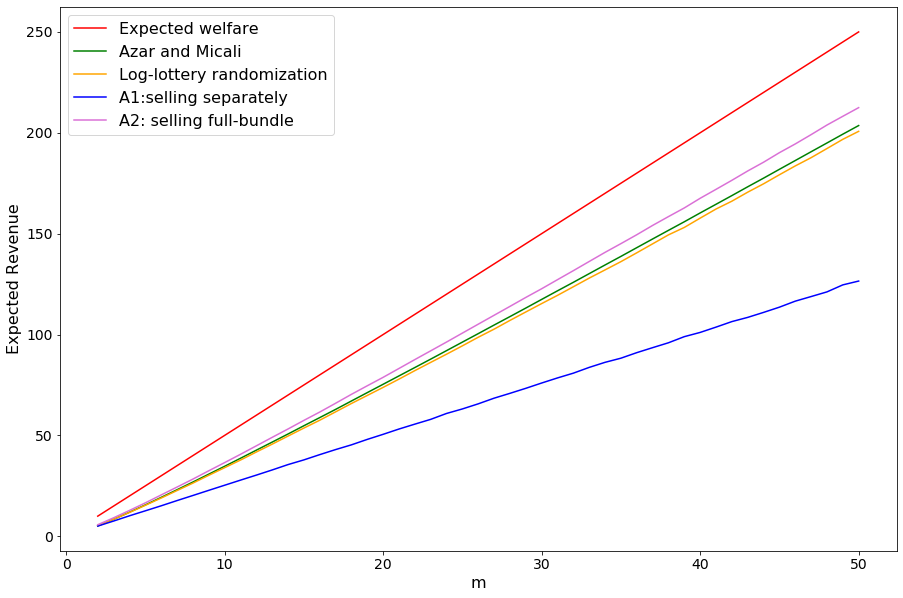

In [9]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)
#ax2.axhline(0,color="red")
plt.xlabel("m",fontsize=16)
plt.ylabel("Expected Revenue",fontsize=16)
# plt.axhline(u_m,color="red",label="Expected welfare")
plt.plot(step, u_m_list, color="red",label="Expected welfare")
plt.plot(step, rev_A_list,color="green",label="Azar and Micali")
plt.plot(step, APX_rev_list,  color="#FFA500",label="Log-lottery randomization")
plt.plot(step, rev_A1_list, color="blue",label="A1:selling separately")
plt.plot(step, rev_A2_list,  color="orchid",label="A2: selling full-bundle")

plt.legend(loc="upper left",fontsize = 16)
#plt.savefig("MulU19_items.png",bbox_inches='tight')

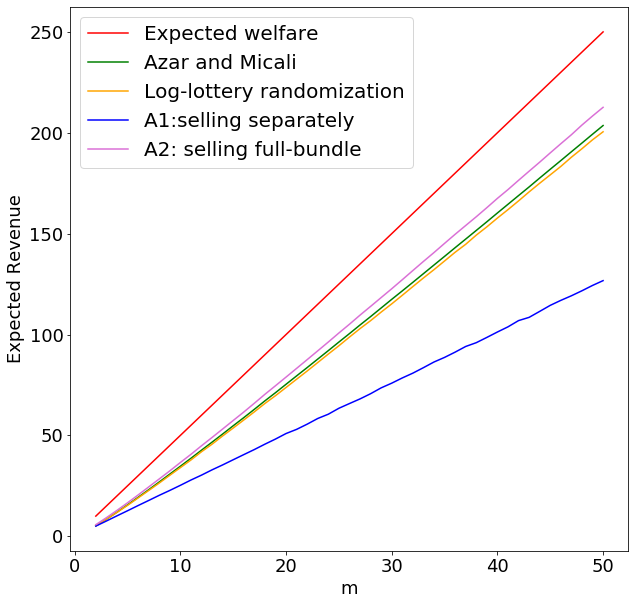

In [14]:
plt.figure(figsize=(10,10))
plt.tick_params(axis='x', labelsize= 18)
plt.tick_params(axis='y', labelsize= 18)
#ax2.axhline(0,color="red")
plt.xlabel("m",fontsize=18)
plt.ylabel("Expected Revenue",fontsize=18)
# plt.axhline(u_m,color="red",label="Expected welfare")
plt.plot(step, u_m_list, color="red",label="Expected welfare")
plt.plot(step, rev_A_list,color="green",label="Azar and Micali")
plt.plot(step, APX_rev_list,  color="#FFA500",label="Log-lottery randomization")
plt.plot(step, rev_A1_list, color="blue",label="A1:selling separately")
plt.plot(step, rev_A2_list,  color="orchid",label="A2: selling full-bundle")

plt.legend(loc="upper left",fontsize = 20)
#plt.savefig("MulU19_items_s.png",bbox_inches='tight')

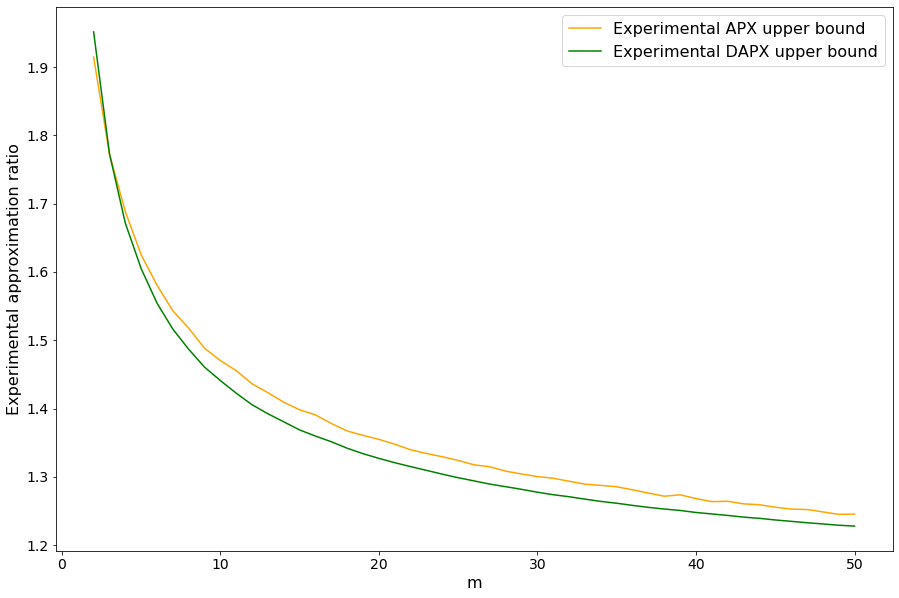

In [7]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)
#ax2.axhline(0,color="red")
plt.xlabel("m",fontsize=16)
plt.ylabel("Experimental approximation ratio",fontsize=16)
# plt.axhline(u_m,color="red",label="Expected welfare")
#plt.plot(step, rho_list, color="pink",label="rho")
plt.plot(step, APX_uniform_list, color="#FFA500",label="Experimental APX upper bound")
plt.plot(step, DAPX, color="green",label="Experimental DAPX upper bound")

plt.legend(loc="best",fontsize = 16)
#plt.savefig("MulU19_ratio.png",bbox_inches='tight')

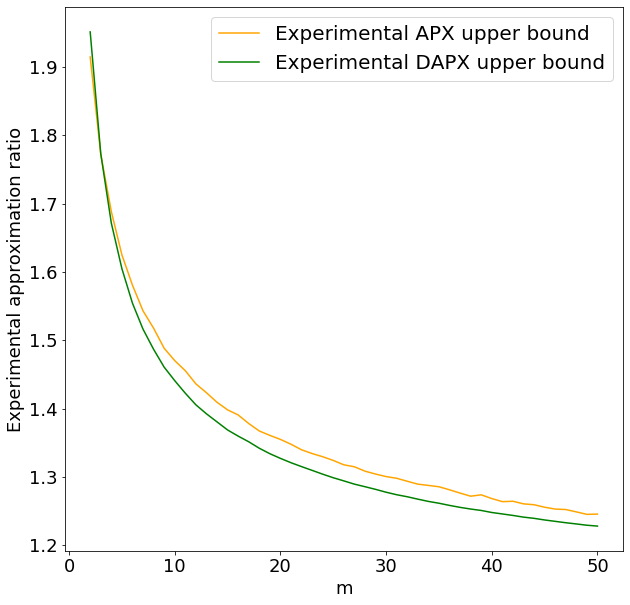

In [8]:
plt.figure(figsize=(10,10))
plt.tick_params(axis='x', labelsize= 18)
plt.tick_params(axis='y', labelsize= 18)
#ax2.axhline(0,color="red")
plt.xlabel("m",fontsize=18)
plt.ylabel("Experimental approximation ratio",fontsize=18)
# plt.axhline(u_m,color="red",label="Expected welfare")
#plt.plot(step, rho_list, color="pink",label="rho")
plt.plot(step, APX_uniform_list, color="#FFA500",label="Experimental APX upper bound")
plt.plot(step, DAPX, color="green",label="Experimental DAPX upper bound")

plt.legend(loc="best",fontsize = 20)
#plt.savefig("MulU19_ratio_s.png",bbox_inches='tight')